Точность модели: 1.0


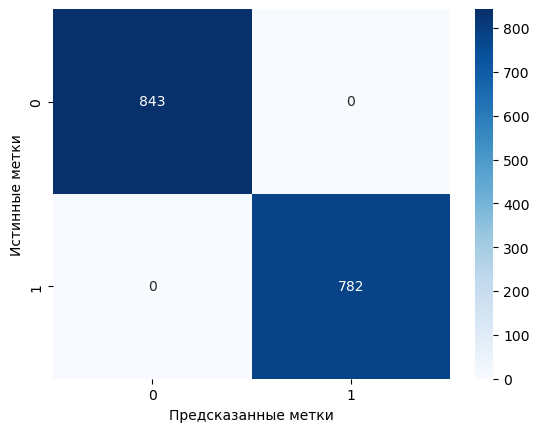

Правила дерева решений:
 |--- odor_n <= 0.50
|   |--- stalk-root_c <= 0.50
|   |   |--- stalk-root_r <= 0.50
|   |   |   |--- spore-print-color_u <= 0.50
|   |   |   |   |--- odor_l <= 0.50
|   |   |   |   |   |--- gill-spacing_w <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- gill-spacing_w >  0.50
|   |   |   |   |   |   |--- stalk-shape_t <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- stalk-shape_t >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- odor_l >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- spore-print-color_u >  0.50
|   |   |   |   |--- class: 0
|   |   |--- stalk-root_r >  0.50
|   |   |   |--- class: 0
|   |--- stalk-root_c >  0.50
|   |   |--- spore-print-color_w <= 0.50
|   |   |   |--- class: 0
|   |   |--- spore-print-color_w >  0.50
|   |   |   |--- class: 1
|--- odor_n >  0.50
|   |--- spore-print-color_r <= 0.50
|   |   |--- stalk-surface-below-ring_y <= 0.50
|   |   |   |---

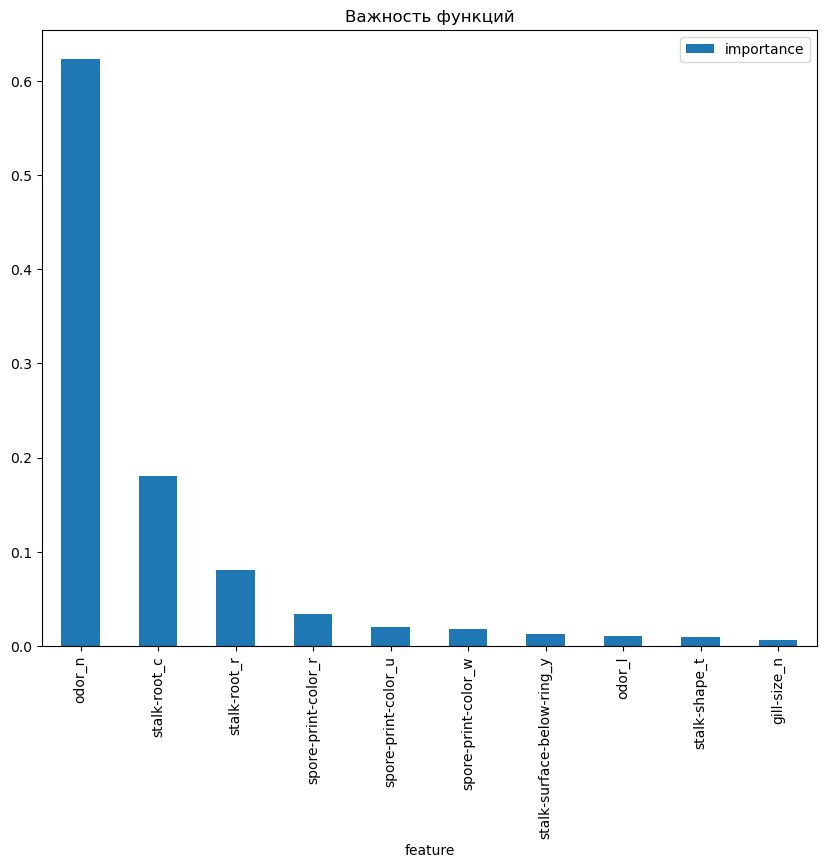

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import export_text
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('mushrooms.csv')

data_encoded = pd.get_dummies(data, drop_first=True)

X = data_encoded.drop("class_p", axis=1)
y = data_encoded["class_p"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Точность модели:", accuracy)

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.show()

tree_rules = export_text(tree, feature_names=list(X.columns))
print("Правила дерева решений:\n", tree_rules)

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(tree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances_top10 = importances.head(10)
importances_top10.plot(kind='bar', figsize=(10,8))
plt.title('Важность функций')
plt.show()
